A mixed model (or more precisely mixed error-component model) is a statistical model containing both fixed effects and random effects. It is an extension of simple linear models. These models are useful in a wide variety of disciplines in the physical, biological and social sciences. It is the regression models which is one of the powerful tool for linear regression models when your data contains global and group-level trends.

Linear mixed models are an extension of simple linear models to allow both fixed and random effects. They are sometimes called “multilevel models” or “hierarchical models”, depending on the context. They are particularly used when there is non-independence in the data. Examples of where you need mixed-effects models include cases in which students could be sampled from within classrooms; patients from within doctors; data points from different districts or sectors. Mixed-effect models account for both (1) the variation that is explained by the independent variables of interest (fixed effects) and (2) the variation that is not explained by the independent variables of interest (random effects). Because of this combination of fixed and random effects, the model is called a mixed-effects model.

In [2]:
import pandas as pd 
df = pd.read_csv('politeness_data.csv')
df.head(3)

,subject,gender,scenario,attitude,frequency
0,F1,F,1,pol,213.3
1,F1,F,1,inf,204.5
2,F1,F,2,pol,285.1


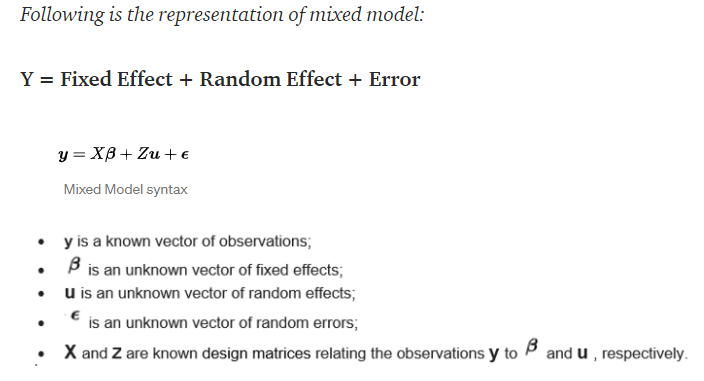

In [3]:
df.shape

(84, 5)

In [4]:
df.isnull().sum()

subject      0
gender       0
scenario     0
attitude     0
frequency    1
dtype: int64

In [5]:
#drop missing data
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

subject      0
gender       0
scenario     0
attitude     0
frequency    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 83
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    83 non-null     object 
 1   gender     83 non-null     object 
 2   scenario   83 non-null     int64  
 3   attitude   83 non-null     object 
 4   frequency  83 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.9+ KB


In [9]:
df.select_dtypes(include='object').describe()

,subject,gender,attitude
count,83,83,83
unique,6,2,2
top,M3,F,inf
freq,14,42,42


In [11]:
df.select_dtypes(exclude='object').describe()

,scenario,frequency
count,83.000000,83.000000
mean,3.975904,193.581928
std,2.012012,65.540680
min,1.000000,82.200000
25%,2.000000,131.550000
50%,4.000000,203.900000
75%,6.000000,248.550000
max,7.000000,306.800000


The difference in politeness level is represented in the column called “attitude”. In that column, “pol” stands for polite and “inf” for informal. Sex is represented as “F” and “M” in the column “gender”. The dependent measure is “frequency”, which is the voice pitch measured in Hertz (Hz). The interesting random effects for us are in the column “subject” and “scenario”.

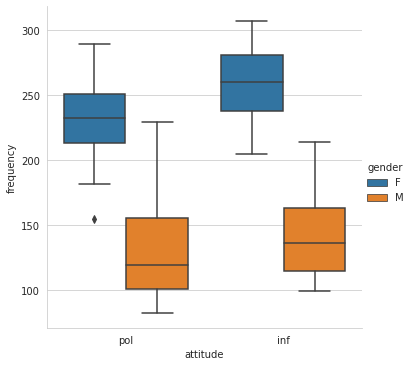

In [21]:
#elationship between politeness and pitch by means of a boxplot:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.catplot(x="attitude", y="frequency",
                hue="gender",
                data=df, kind="box",
                );
plt.show()

In both this cases, the median line which is a black line in the center of boxplot; is lower for the polite than for the informal condition. However, there
may be a bit more overlap between the two politeness categories for males than for females.

o, here frequency is our dependent variable, attitude is our fixed effect, subject and scenario are our random effects. 

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Encode labels in column 'species'.
df['attitude']= le.fit_transform(df['attitude'])
df['gender']= le.fit_transform(df['gender'])
df['subject']= le.fit_transform(df['subject'])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 83
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    83 non-null     int64  
 1   gender     83 non-null     int64  
 2   scenario   83 non-null     int64  
 3   attitude   83 non-null     int64  
 4   frequency  83 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 6.4 KB


In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
md = smf.mixedlm("frequency ~ attitude", df, groups=df['scenario'])

In [51]:
mdf = md.fit()
print(mdf.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: frequency
No. Observations: 83      Method:             REML     
No. Groups:       7       Scale:              4263.4044
Min. group size:  11      Likelihood:         -457.1524
Max. group size:  12      Converged:          No       
Mean group size:  11.9                                 
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept 202.588   10.076 20.106 0.000 182.840 222.337
attitude  -18.232   14.337 -1.272 0.203 -46.332   9.868
Group Var   0.107    5.064                             



/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2063: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2075: ConvergenceWarning: Gradient optimization failed, |grad| = 0.102680
  warnings.warn(msg, ConvergenceWarning)


### ANOTHER EXAMPLE

The data show 136 students with records of scores that they got in a given exam and other variables. In our exercise, we want to see if their scores have anything to do with the number of hours they spent practicing, their gender, or their age.

In [29]:
students = pd.read_csv('/content/mixed_effects_dataset.csv')
students.head(2)

,student_id,exercise_hrs,books,score,gender,trainer,age
0,1.0,8.0,2.0,30.0,1.0,Trainer A,29.0
1,2.0,6.0,2.0,20.0,0.0,Trainer A,27.0


In [30]:
students.shape

(115, 7)

In [31]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   student_id    105 non-null    float64
 1   exercise_hrs  105 non-null    float64
 2   books         105 non-null    float64
 3   score         105 non-null    float64
 4   gender        105 non-null    float64
 5   trainer       105 non-null    object 
 6   age           105 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.4+ KB


In [35]:
students.isnull().sum()

student_id      10
exercise_hrs    10
books           10
score           10
gender          10
trainer         10
age             10
dtype: int64

In [36]:
#drop na values
students.dropna(inplace=True)

In [37]:
#students['trainer']= le.fit_transform(students#['trainer])

In [38]:
#Import data and run a linear regression
X = students[['exercise_hrs','age','gender']]
y = students['score']

In [39]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.109
Date:                Thu, 13 May 2021   Prob (F-statistic):              0.104
Time:                        15:06:26   Log-Likelihood:                -459.79
No. Observations:                 105   AIC:                             927.6
Df Residuals:                     101   BIC:                             938.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.1502     10.028      4.303   

At first glance, we can tell that the number of hours spent practicing is statistically significant. That seems to make sense since the more time you spend studying the more likely is your score to increase. However, to run linear regression, some assumptions about the data need to be met. One of these is that the residuals are homoscedastic, which means that the residuals are normally distributed in relation to the predicted value. We can look at this by plotting the residuals. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.

To test the coefficient’s null hypothesis we will be using the t statistic. Look at the P>| t | column. These are the p-values for the t-test. In short, if they are less than the desired significance (commonly .05), you reject the null hypothesis. Otherwise, you fail to reject the null and therefore should toss out that independent variable.

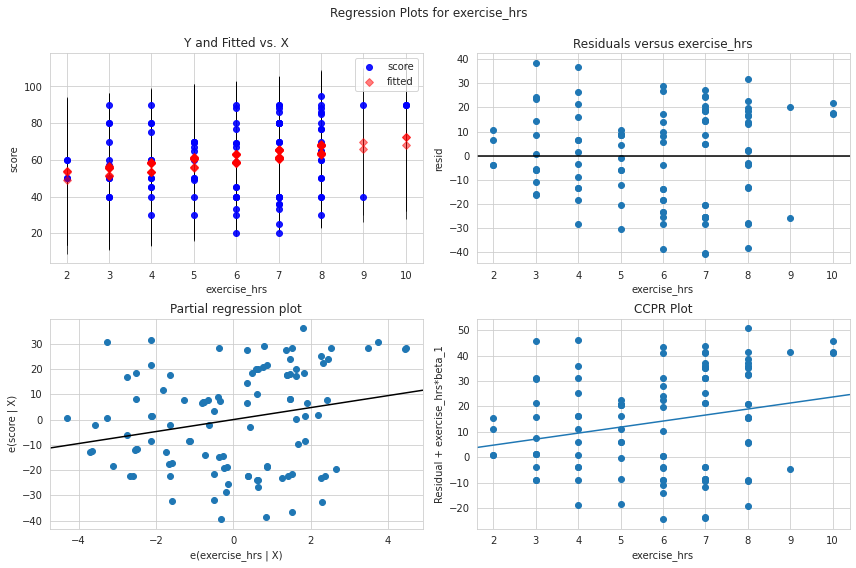

In [41]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'exercise_hrs', fig=fig)

Well, we can tell that our variance is not constant throughout. This means that linear regression is not the appropriate approach. Thus, we cannot trust the results we got from linear regression, no matter how reasonable they seemed.

One of the other key assumptions of linear regression is that the observations of our data are independent of the other data. Our data were collected (perhaps not) from students trained by 4 different trainers. So we could check this by comparing the scores for each trainer. We can use the boxplot to check this.

In [42]:
students.trainer.value_counts()

Trainer D    29
Trainer C    26
Trainer B    26
Trainer A    24
Name: trainer, dtype: int64

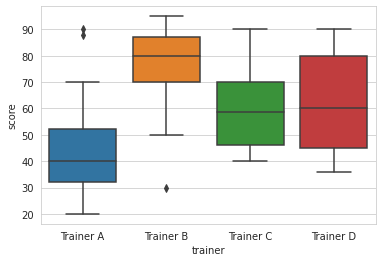

In [44]:
sns.boxplot(x=students.trainer,y=students.score)
plt.show()

Certainly, something is going on. We can see that there is a substantial grouping. This indicates that data are not independent. As we suspected, it looks like scores may have something to do with the trainer. So, we need to capture that in our model. But how?

So to look at the impact of our variables on scores times we need to control for the variation between the different trainers. So to do that, we have to treat our trainers as random effects, and build a mixed effect model! A mixed model is a good choice because it will allow us to account for the correlations between data (students' scores) coming from the same trainer.

In this model, we need to specify the grouping variable. In our case, the grouping variable will be "trainer". That means we are suspecting that scores may vary based on the person who trains a student.

 Basically, we want to test if students' scores change or vary with the trainer.

In [45]:
model = sm.MixedLM.from_formula("score ~ exercise_hrs + age + gender", students, groups=students["trainer"])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: score    
No. Observations: 105     Method:             REML     
No. Groups:       4       Scale:              241.9825 
Min. group size:  24      Likelihood:         -436.2143
Max. group size:  29      Converged:          Yes      
Mean group size:  26.2                                 
-------------------------------------------------------
              Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     32.218   10.860 2.967 0.003 10.933 53.503
exercise_hrs   3.754    0.824 4.557 0.000  2.139  5.368
age            0.125    0.258 0.485 0.627 -0.381  0.631
gender         5.725    3.118 1.836 0.066 -0.386 11.837
Group Var    206.637   11.562                          
=======================================================

"""